In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

ModuleNotFoundError: No module named 'keras'

In [2]:
# Load your dataset with a 'Date' and 'Close' column
# Replace 'your_dataset.csv' with your dataset file
data = pd.read_csv('GOOG.csv')
data['Date'] = pd.to_datetime(data['date'])
data.set_index('Date', inplace=True)

In [3]:
data

NameError: name 'data' is not defined

In [5]:
# Extract the 'Close' prices and normalize the data
scaler = MinMaxScaler()
data['close'] = scaler.fit_transform(data['close'].values.reshape(-1, 1))


In [6]:
# Define a function to prepare the data for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [7]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.7)
test_size = len(data) - train_size
train_data, test_data = data.iloc[0:train_size], data.iloc[train_size:len(data)]


In [8]:
# Convert the data to numpy arrays
train_data = train_data['close'].values.reshape(-1, 1)
test_data = test_data['close'].values.reshape(-1, 1)

# Set the look-back period (number of previous time steps to consider)
look_back = 30


In [9]:
# Prepare the training and testing datasets
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Reshape the data to be 3-dimensional (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [10]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

2023-09-09 18:42:09.957205: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-09 18:42:09.980008: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-09 18:42:09.990556: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [11]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Make predictions on the test data
predictions = model.predict(X_test)

Epoch 1/100


2023-09-09 18:42:25.153907: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-09 18:42:25.171800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-09 18:42:25.180676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

14/14 [==============================] - 41s 148ms/step - loss: 0.0128
Epoch 2/100
14/14 [==============================] - 2s 149ms/step - loss: 0.0023
Epoch 3/100
14/14 [==============================] - 2s 115ms/step - loss: 0.0011
Epoch 4/100
14/14 [==============================] - 2s 116ms/step - loss: 4.9794e-04
Epoch 5/100
14/14 [==============================] - 2s 116ms/step - loss: 3.3172e-04
Epoch 6/100
14/14 [==============================] - 2s 115ms/step - loss: 3.3115e-04
Epoch 7/100
14/14 [==============================] - 2s 112ms/step - loss: 3.1317e-04
Epoch 8/100
14/14 [==============================] - 2s 110ms/step - loss: 3.0358e-04
Epoch 9/100
14/14 [==============================] - 2s 121ms/step - loss: 3.0701e-04
Epoch 10/100
14/14 [==============================] - 2s 118ms/step - loss: 3.0637e-04
Epoch 11/100
14/14 [==============================] - 3s 187ms/step - loss: 3.0117e-04
Epoch 12/100
14/14 [==============================] - 2s 159ms/step - loss:

2023-09-09 18:45:55.118826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-09 18:45:55.124145: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-09 18:45:55.129482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

11/11 [==============================] - 4s 26ms/step


In [12]:
# Inverse transform the predictions and actual values to original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# A lower MAPE value suggests that your predictive model is performing well and has good accuracy.

In [18]:
print(f'Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_test,predictions)}')

Mean Absolute Percentage Error (RMSE): 0.026257743603941407


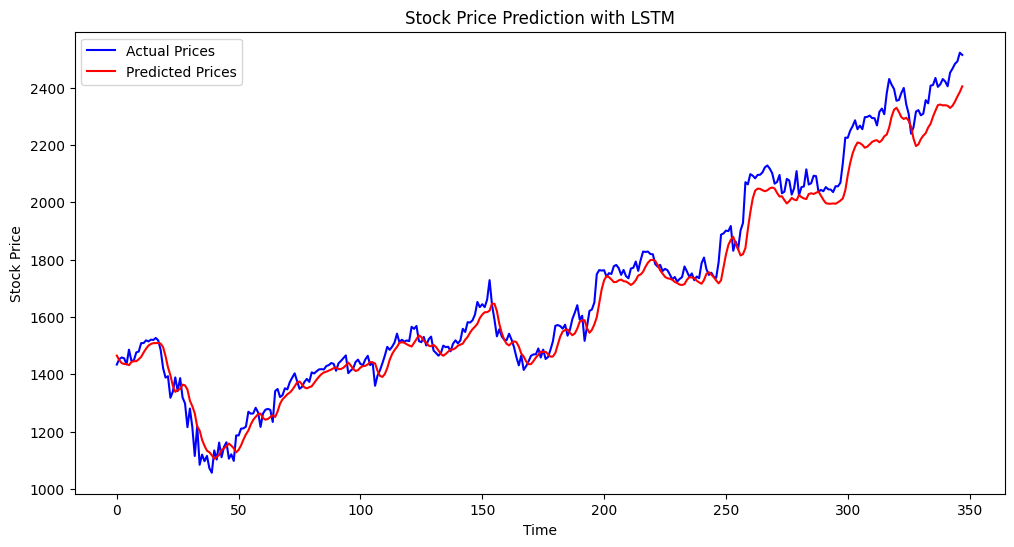

In [14]:
# Plot the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction with LSTM')
plt.legend()
plt.show()